In [13]:
import matplotlib.pyplot as plt
from lib.preprocess import preprocess_progenitor_size, preprocess_whole_size
from lib.utils import shrink_and_align_stats
from lib.score import REF
from lib.analyser import show_curve, show_curve_progenitor
from jf.utils.export import Exporter
from jf.models.stringmodel import read_model
import os
import numpy as np

In [2]:
sm = read_model("generation")

In [3]:
from lib.sde.grn2 import GRNMain2
from lib.sde.mutate import mutate_grn2

class Solution:
    def __init__(self, grn):
        self.grn = grn
        
    def copy(self):
        return Solution(self.grn.copy())
        
    def mutate(self):
        mutate_grn2(self.grn)

In [8]:
def plot_max_fitness(exporter, sm):
    ls = list(filter(sm.match, sorted(exporter.list())))
    vals = [(int(sm.extract(x)["generation"]), max(exporter.load(x)["fitness"])) for x in ls]
    vals.sort()
    plt.title("Max fitness")
    plt.plot(*zip(*vals))
    plt.ylim(bottom=0)
    
def plot_sum_fitness(exporter, sm):
    ls = list(filter(sm.match, sorted(exporter.list())))
    vals = [(int(sm.extract(x)["generation"]), sum(exporter.load(x)["fitness"])) for x in ls]
    vals.sort()
    plt.title("Sum fitness")
    plt.plot(*zip(*vals))
    plt.ylim(bottom=0)
    
def max_fitness(exporter, sm):
    ls = list(filter(sm.match, sorted(exporter.list())))
    return max([max(exporter.load(x)["fitness"]) for x in ls])

In [5]:
# sm.pick_last(sorted(exporter.list()), slot="generation")

In [37]:
sorted(filter(lambda x: x.startswith("result"), os.listdir("output/")))

['result_m1_t0.5_n7_o1.5_i0',
 'result_m1_t0.5_n7_o1.5_i1',
 'result_m1_t0.5_n7_o1.5_i2',
 'result_m1_t0.5_n7_o1.5_i3',
 'result_m1_t0.5_n7_o1.5_i4',
 'result_m3_t0.25_n7_o1.5_i0',
 'result_m3_t0.25_n7_o1.5_i1',
 'result_m3_t0.25_n7_o1.5_i2',
 'result_m3_t0.25_n7_o1.5_i3',
 'result_m3_t0.25_n7_o1.5_i4',
 'result_m3_t0.5_n5_o1.5_i0',
 'result_m3_t0.5_n5_o1.5_i1',
 'result_m3_t0.5_n5_o1.5_i2',
 'result_m3_t0.5_n5_o1.5_i3',
 'result_m3_t0.5_n5_o1.5_i4',
 'result_m3_t0.5_n7_o1.0_i0',
 'result_m3_t0.5_n7_o1.0_i1',
 'result_m3_t0.5_n7_o1.0_i2',
 'result_m3_t0.5_n7_o1.0_i3',
 'result_m3_t0.5_n7_o1.0_i4',
 'result_m3_t0.5_n7_o1.5_i0',
 'result_m3_t0.5_n7_o1.5_i1',
 'result_m3_t0.5_n7_o1.5_i2',
 'result_m3_t0.5_n7_o1.5_i3',
 'result_m3_t0.5_n7_o1.5_i4',
 'result_m3_t0.5_n7_o2.0_i0',
 'result_m3_t0.5_n7_o2.0_i1',
 'result_m3_t0.5_n7_o2.0_i2',
 'result_m3_t0.5_n7_o2.0_i3',
 'result_m3_t0.5_n9_o1.5_i0',
 'result_m3_t0.5_n9_o1.5_i1',
 'result_m3_t0.5_n9_o1.5_i2',
 'result_m3_t0.5_n9_o1.5_i3',
 'res

In [43]:
def get_mean_sd(prefix):
    ls = filter(lambda x: x.startswith(prefix), os.listdir("output/"))
    max_ls = []
    for name in ls:
        try:
            max_ls.append(max_fitness(Exporter(name=name, silent=True), sm))
        except:
            print(name)
    print(max_ls)
    return np.mean(max_ls), np.std(max_ls)

In [44]:
print(get_mean_sd("result_m3_t0.25_n7_o1.5"))
print(get_mean_sd("result_m3_t0.5_n7_o1.5"))
print(get_mean_sd("result_m3_t1.0_n7_o1.5"))

result_m3_t0.25_n7_o1.5_i3
[3.323056214800801, 5.783349942045103, 6.101275009390531, 4.137253859034707]
(4.836233756317785, 1.148437809613539)
[5.234175825317285, 5.062223020126641, 7.6161363448759065, 15.394535629087452, 13.978446755210063]
(9.457103514923471, 4.387092380225705)
result_m3_t1.0_n7_o1.5_i3
[5.867096773975227, 4.733101816355245, 4.6837842276072825, 4.722478626121117]
(5.001615361014718, 0.5000228859701897)


In [45]:
print(get_mean_sd("result_m1_t0.5_n7_o1.5"))
print(get_mean_sd("result_m3_t0.5_n7_o1.5"))
print(get_mean_sd("result_m5_t0.5_n7_o1.5"))

result_m1_t0.5_n7_o1.5_i3
[4.757852795429746, 24.74215971363541, 5.030019782512966, 4.674516193004684]
(9.801137121145702, 8.627205163017098)
[5.234175825317285, 5.062223020126641, 7.6161363448759065, 15.394535629087452, 13.978446755210063]
(9.457103514923471, 4.387092380225705)
[8.008084764693063, 9.38474882496093, 4.920900235882735, 4.694112587614898, 5.75874980962681]
(6.553319244555686, 1.8377223940186018)


In [46]:
print(get_mean_sd("result_m3_t0.5_n5_o1.5"))
print(get_mean_sd("result_m3_t0.5_n7_o1.5"))
print(get_mean_sd("result_m3_t0.5_n9_o1.5"))

[4.107537328230964, 4.489459796058012, 4.968948764416853, 21.572171583974345, 7.57823606757261]
(8.543270708050557, 6.626740386883239)
[5.234175825317285, 5.062223020126641, 7.6161363448759065, 15.394535629087452, 13.978446755210063]
(9.457103514923471, 4.387092380225705)
result_m3_t0.5_n9_o1.5_i3
[6.762259308212645, 4.585955193296924, 5.712980201151248, 9.676503706166752]
(6.684424602206892, 1.8911553142382007)


In [47]:
print(get_mean_sd("result_m3_t0.5_n7_o1.0"))
print(get_mean_sd("result_m3_t0.5_n7_o1.5"))
print(get_mean_sd("result_m3_t0.5_n7_o2.0"))

[5.027782909295187, 4.66309184839676, 2.100746556780629, 4.214119151698266, 4.276109074837401]
(4.056369908201648, 1.0207240125722903)
[5.234175825317285, 5.062223020126641, 7.6161363448759065, 15.394535629087452, 13.978446755210063]
(9.457103514923471, 4.387092380225705)
[10.545823223522572, 7.49355226897505, 17.89289965476948, 7.410416329963589]
(10.835672869307672, 4.265870813388764)


Exporting at output/result_m3_t0.5_n7_o2.0_i0


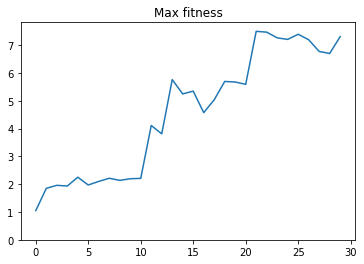

Exporting at output/result_m3_t0.5_n7_o2.0_i1


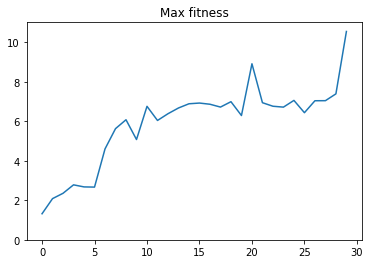

Exporting at output/result_m3_t0.5_n7_o2.0_i2


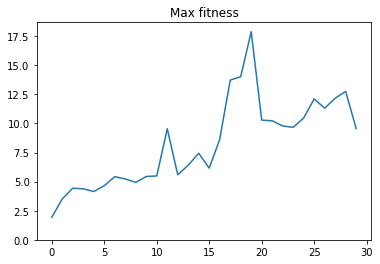

In [48]:
plot_max_fitness(Exporter(name="result_m3_t0.5_n7_o2.0_i0"), sm)
plt.show()
plot_max_fitness(Exporter(name="result_m3_t0.5_n7_o2.0_i1"), sm)
plt.show()
plot_max_fitness(Exporter(name="result_m3_t0.5_n7_o2.0_i2"), sm)
plt.show()

In [49]:
exporter = Exporter(name="result_m3_t0.5_n7_o2.0_i2")

Exporting at output/result_m3_t0.5_n7_o2.0_i2


In [50]:
def pick_best_sol_stats(res):
    fit = res['fitness']
    index = fit.index(max(fit))
    sol = res["solution"][index]
    stats = res["stats"][index]
    print("fit is ", max(fit))
    return sol, stats

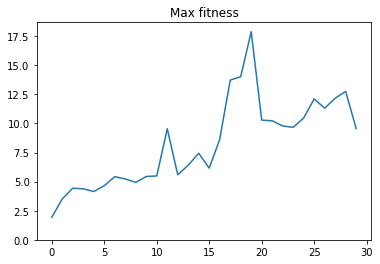

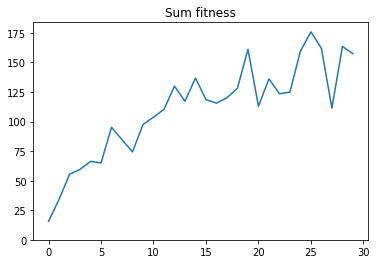

In [51]:
plot_max_fitness(exporter, sm)
plt.show()
plot_sum_fitness(exporter, sm)

In [52]:
last_gen = sm.pick_last(sorted(exporter.list()), slot="generation")
last_gen

'generation_g29'

In [53]:
last_gen = sm.pick_last(sorted(exporter.list()), slot="generation")
last_gen

'generation_g29'

fit is  17.89289965476948


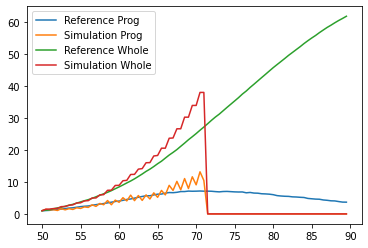

In [59]:
res = exporter.load("generation_g19")
sol, stats = pick_best_sol_stats(res)
show_curve(stats, REF)

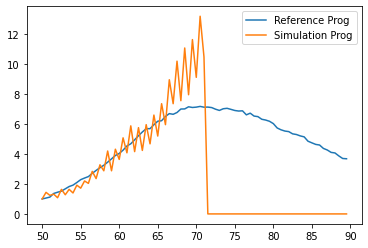

In [60]:
show_curve_progenitor(stats, REF)

fit is  9.559029668436393


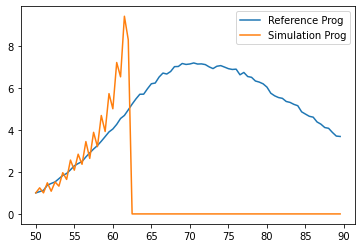

>> G_0: init: 2.62; noise: 1.58; b: 8.26; m: 2.42; expr: 6.69; deg: 3.05; theta: 5.78; tree : 1
>> G_1: init: 0.60; noise: 9.04; b: 7.88; m: 9.70; expr: 7.53; deg: 5.96; theta: 9.26; tree : 4
>> G_2: init: 2.70; noise: 2.68; b: 3.71; m: 4.59; expr: 8.52; deg: 0.03; theta: 6.02; tree : 5
>> G_3: init: 0.75; noise: 4.21; b: 9.83; m: 9.63; expr: 4.24; deg: 3.15; theta: 0.86; tree : ((NOT 6 OR ((3 OR 2) OR 4)) AND (1 OR 0))
>> G_4: init: 0.51; noise: 7.72; b: 6.96; m: 3.94; expr: 0.48; deg: 1.72; theta: 9.58; tree : 3
>> G_5: init: 0.80; noise: 7.51; b: 2.37; m: 3.37; expr: 0.32; deg: 0.40; theta: 9.56; tree : 3
>> G_6: init: 2.18; noise: 3.39; b: 9.64; m: 9.45; expr: 8.62; deg: 2.30; theta: 0.86; tree : 5

In [61]:
res = exporter.load(last_gen)
sol, stats = pick_best_sol_stats(res)
show_curve_progenitor(stats, REF)
sol.grn